In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('nba_games.csv')
data = data.replace(['`1'], 1)
print(f'Shape of dataframe:  {data.shape}')

print(f'Datatype: {type(data)}')
data.head()

Shape of dataframe:  (6269, 66)
Datatype: <class 'pandas.core.frame.DataFrame'>


,ts%,efg%,3par,ftr,orb%,drb%,trb%,ast%,stl%,blk%,...,ast_opp,stl_opp,blk_opp,tov_opp,pf_opp,pts_opp,home,away,date,winner
0,0.509,0.490,0.381,0.144,22.6,87.8,53.9,50.0,6.7,8.2,...,18,8,5,16,20,87,BOS,PHI,16-Oct-18,1
1,0.525,0.479,0.274,0.189,37.0,71.9,56.3,66.7,6.8,13.0,...,21,12,6,14,21,100,GSW,OKC,16-Oct-18,1
2,0.551,0.533,0.413,0.239,16.4,74.4,41.8,51.2,7.8,17.6,...,26,5,4,21,25,113,CHO,MIL,17-Oct-18,0
3,0.506,0.457,0.261,0.239,29.2,86.5,54.1,53.8,5.0,9.1,...,28,9,5,17,23,100,DET,BRK,17-Oct-18,1
4,0.546,0.511,0.522,0.261,16.7,67.4,40.7,53.8,7.8,9.6,...,36,8,3,12,25,131,HOU,NOP,17-Oct-18,0


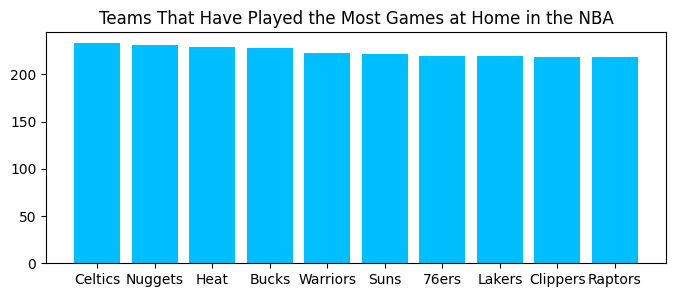

In [31]:
plt.rcParams['figure.figsize'] = 8,3
games_played = data['home'].value_counts()[:10]
names = ['Celtics', 'Nuggets', 'Heat', 'Bucks', 'Warriors', 'Suns', '76ers','Lakers', 'Clippers', 'Raptors']
plt.bar(names, games_played, color ='deepskyblue');
plt.title('Teams That Have Played the Most Games at Home in the NBA');


In [5]:
team_names = 'GSW', 'UTA', 'PHI', 'DEN', 'ATL', 'MEM', 'WAS', 'CLE', 'HOU', 'MIA', 'MIL', 'POR', 'DAL', 'MIN', 'SAS', 'DET', 'NOP', 'LAL', 'PHO', 'IND', 'ORL', 'BOS', 'TOR', 'LAC', 'BRK', 'OKC', 'CHO', 'SAC', 'CHI', 'NYK'

In [6]:
win_pcts = []

for team in team_names:
    filter1 = (data.home == team) | (data.away == team)
    filter2 = data.winner == 0 
    losers_df = data.where(filter1 & filter2)
    losers_df.dropna(inplace=True)
    len_losers = len(losers_df)
    
    filter3 = (data.home == team) | (data.away == team)
    filter4 = data.winner == 1 
    winners_df = data.where(filter3 & filter4)
    winners_df.dropna(inplace=True)
    len_winners = len(winners_df)
    
    win_pct = (len_winners / (len_winners + len_losers))*100
    win_pcts.append(win_pct)
    
    

''

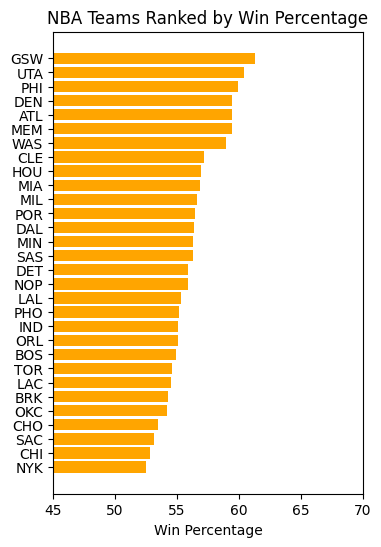

In [33]:
plt.rcParams['figure.figsize'] = 4,6
fig, ax = plt.subplots()
ax.barh(team_names, win_pcts, align='center', color='orange');
#ax.set_yticks(x, labels = _labels)
ax.invert_yaxis()
ax.set_xlabel('Win Percentage')
plt.title('NBA Teams Ranked by Win Percentage')
ax.set_xlim([45, 70])
;

In [8]:
def_rtg = []
off_rtg = []
for team in team_names:
    filter3 = (data.home == team) | (data.away == team) 
    df = data.where(filter3)
    df = df.dropna()
    drtg = df['drtg'].mean()
    ortg = df['ortg'].mean()
    def_rtg.append(drtg)
    off_rtg.append(ortg) 

''

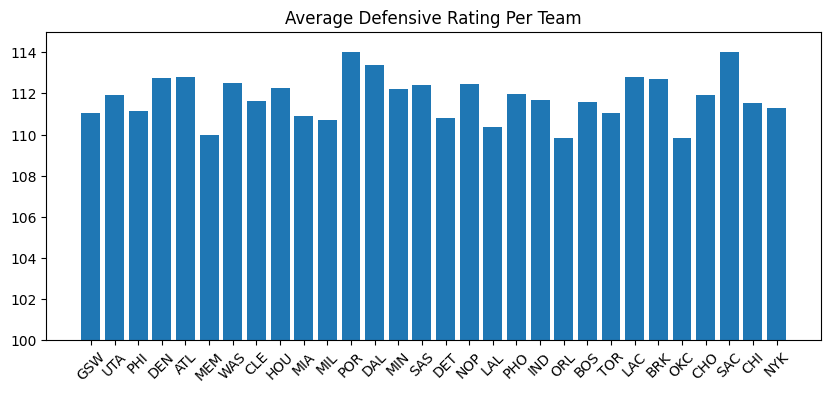

In [34]:
plt.rcParams['figure.figsize'] = 10,4
fig, ax = plt.subplots()
ax.bar(team_names, def_rtg)
ax.set_ylim([100, 115])
plt.xticks(rotation=45)
plt.title('Average Defensive Rating Per Team')
;

''

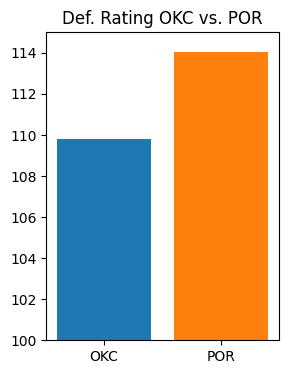

In [36]:
OKC = min(def_rtg)
POR = max(def_rtg)

plt.rcParams['figure.figsize'] = 3,4
fig, ax = plt.subplots()
ax.bar('OKC', OKC)
ax.bar('POR', POR)
ax.set_ylim([100, 115])
plt.title('Def. Rating OKC vs. POR')
;
# Difference between team with best defensive rating and worst defensive rating. 

In [ ]:
sub_data = data[['ts%', 'efg%', '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%',
       'blk%', 'tov%', 'ortg', 'drtg', 'ts%_opp', 'efg%_opp', '3par_opp',
       'ftr_opp', 'orb%_opp', 'drb%_opp', 'trb%_opp', 'ast%_opp', 'stl%_opp',
       'blk%_opp', 'tov%_opp', 'ortg_opp', 'drtg_opp', 'fg', 'fga', 'fg%',
       '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'fg_opp', 'fga_opp', 'fg%_opp',
       '3p_opp', '3pa_opp', '3p%_opp', 'ft_opp', 'fta_opp', 'ft%_opp',
       'orb_opp', 'drb_opp', 'trb_opp', 'ast_opp', 'stl_opp', 'blk_opp',
       'tov_opp', 'pf_opp', 'pts_opp', 'winner']]
sub_data = pd.DataFrame(sub_data, dtype=np.float64) 

In [12]:
sub_data = sub_data.copy()

In [13]:
home_data = sub_data[['ts%', 'efg%', '3par', 'ftr', 'orb%', 'drb%', 'trb%', 'ast%', 'stl%',
       'blk%', 'tov%', 'ortg', 'drtg', 'fg', 'fga', 'fg%',
       '3p', '3pa', '3p%', 'ft', 'fta', 'ft%', 'orb', 'drb', 'trb', 'ast',
       'stl', 'blk', 'tov', 'pf', 'pts', 'winner']]
home_data = pd.DataFrame(home_data, dtype=np.float64)


In [ ]:
away_data = sub_data[['ts%_opp', 'efg%_opp', '3par_opp',
       'ftr_opp', 'orb%_opp', 'drb%_opp', 'trb%_opp', 'ast%_opp', 'stl%_opp',
       'blk%_opp', 'tov%_opp', 'ortg_opp', 'drtg_opp','fg_opp', 'fga_opp', 'fg%_opp',
       '3p_opp', '3pa_opp', '3p%_opp', 'ft_opp', 'fta_opp', 'ft%_opp',
       'orb_opp', 'drb_opp', 'trb_opp', 'ast_opp', 'stl_opp', 'blk_opp',
       'tov_opp', 'pf_opp', 'pts_opp', 'winner']]
away_data = pd.DataFrame(away_data, dtype=np.float64)


In [48]:
true_shooting = sub_data.groupby('winner')['ts%'].value_counts().unstack().fillna(0)
off_rating = sub_data.groupby('winner').ortg.value_counts().unstack().fillna(0)
def_rating = sub_data.groupby('winner').drtg.value_counts().unstack().fillna(0)

In [38]:
import seaborn as sns

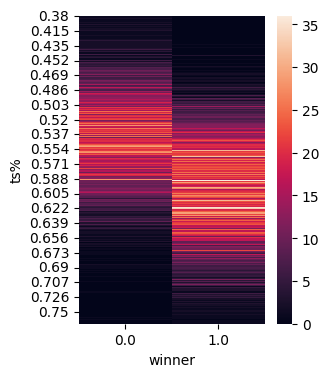

In [39]:
sns.heatmap(true_shooting.T);

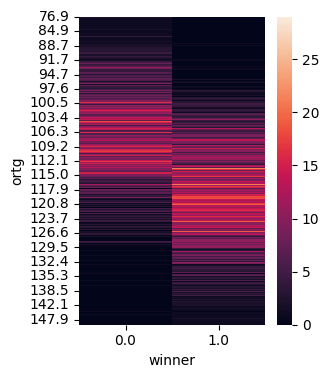

In [44]:
sns.heatmap(off_rating.T);
# how many points a team scores per 100 possessions

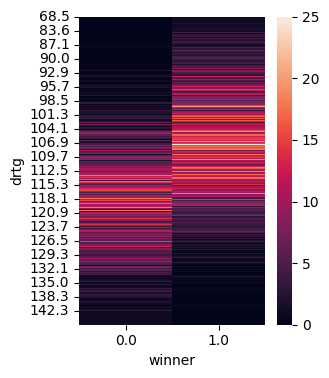

In [43]:
sns.heatmap(def_rating.T);
# defensive rating shows is average points allowed per 100 possessions

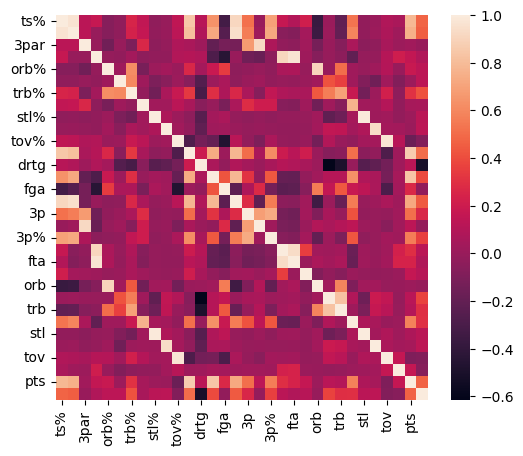

In [23]:
plt.rcParams['figure.figsize'] = 6,5
sns.heatmap(home_data.corr());

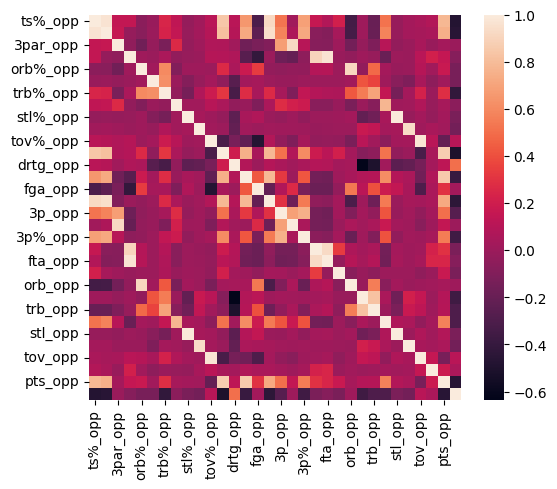

In [22]:
sns.heatmap(away_data.corr());